# Climate Change Prediction
Main Production-ready code.

In [1]:
import numpy as np                                # Load the numpy for more advanced mathamatics
import pandas as pd                               # Load the pandas for preprocessing data
import matplotlib.pyplot as plt                   # Load Matplotlib for graphying and plotting
import copy                                       # Load copy for deep copying data
from sklearn.linear_model import LinearRegression # Load scikit learn for the Linear Regression model
from sklearn.model_selection import train_test_split

# Data PreProcessing

In [9]:
df = pd.read_csv('data2.csv')    # Load the data.csv
df = df.drop(["J-D", "D-N", "DJF", "MAM", "JJA", "SON"], axis=1)
df = df.fillna(method='ffill')
df.tail()

/var/folders/w1/ltv_559n3b9bp5ymkqdsjnyr0000gp/T/ipykernel_5040/19146274.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
140,2020,1.17,1.24,1.18,1.12,0.99,0.91,0.88,0.86,0.96,0.87,1.10,0.79
141,2021,0.81,0.64,0.89,0.76,0.79,0.84,0.91,0.81,0.92,0.99,0.93,0.87
142,2022,0.91,0.89,1.04,0.83,0.84,0.92,0.94,0.94,0.88,0.96,0.74,0.80
143,2023,0.88,0.97,1.23,0.99,0.94,1.08,1.19,1.19,1.48,1.34,1.42,1.35
144,2024,1.24,1.44,1.39,1.31,1.16,1.24,1.20,1.30,1.26,1.34,1.42,1.35


Plot all the data columns

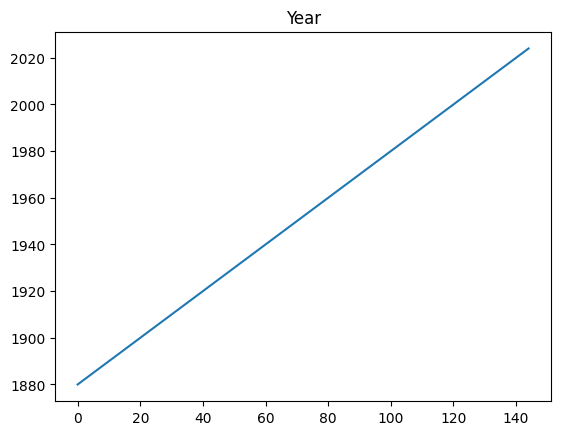

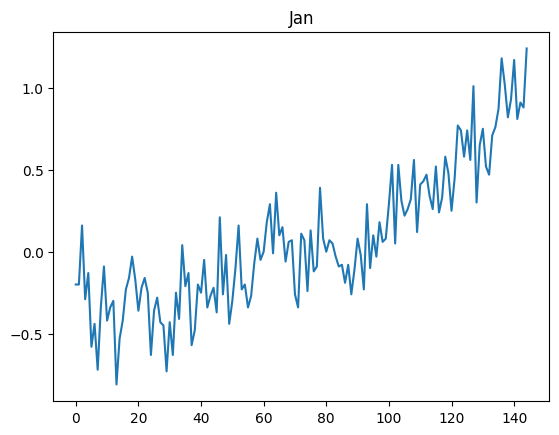

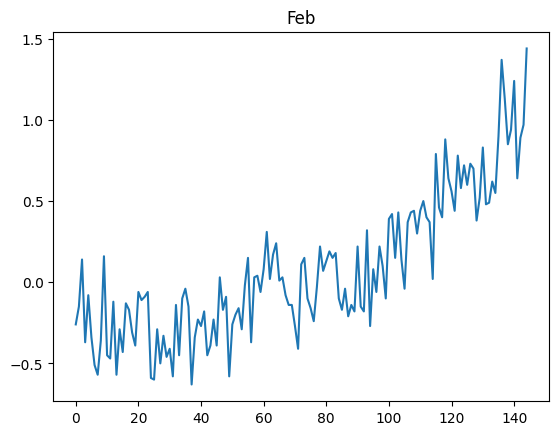

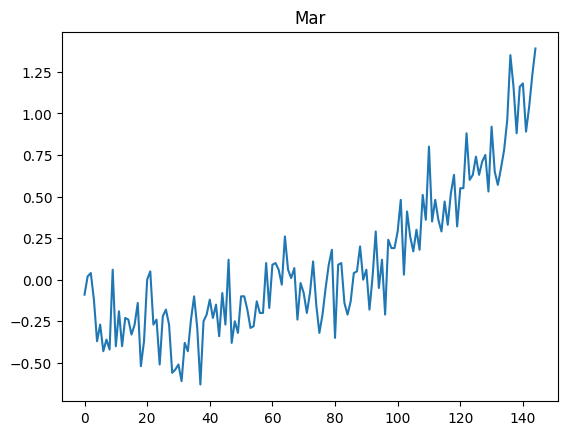

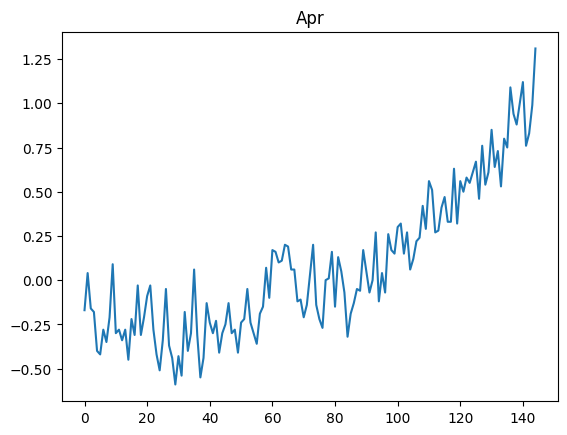

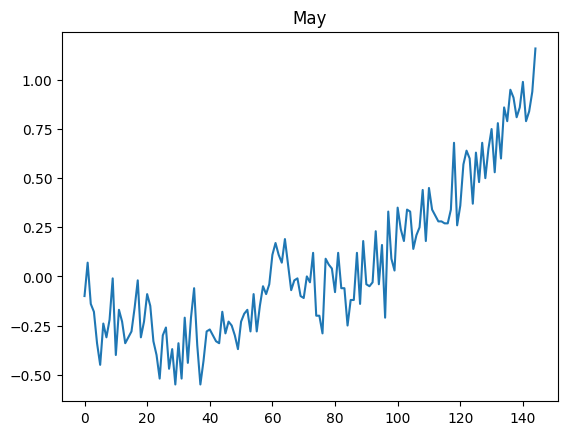

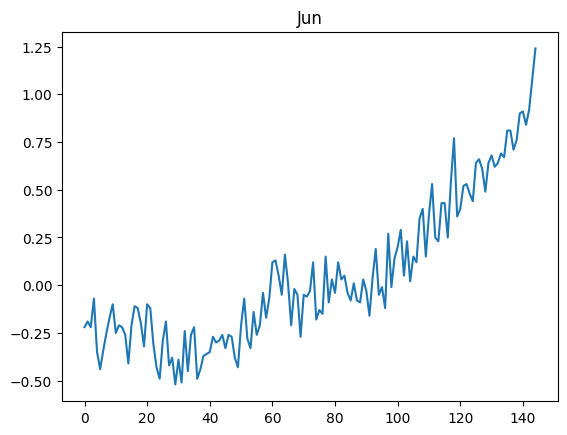

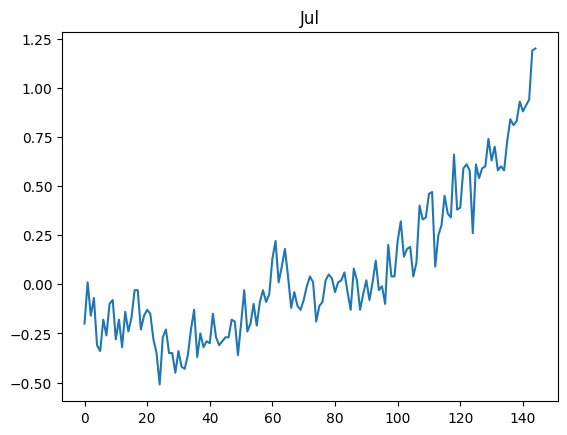

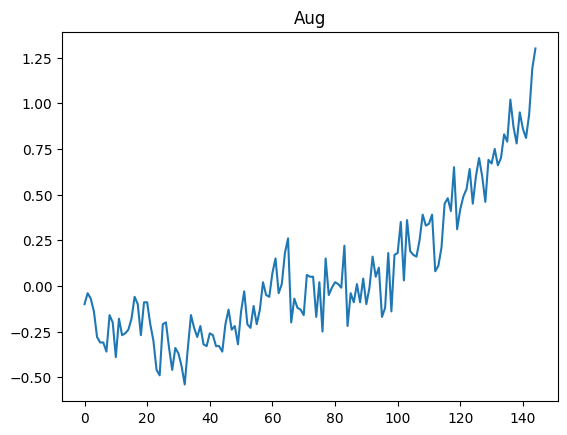

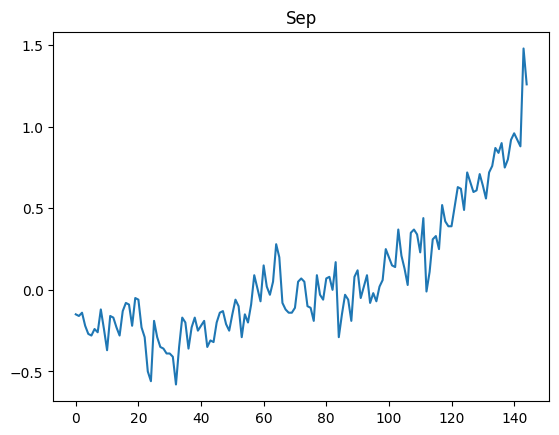

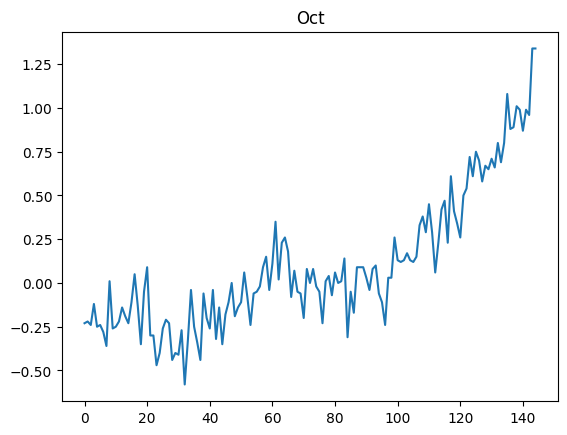

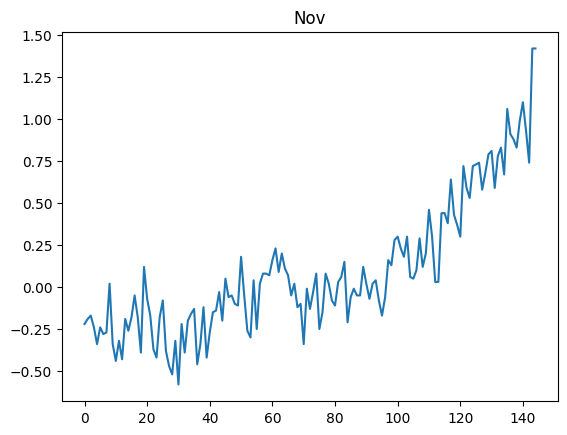

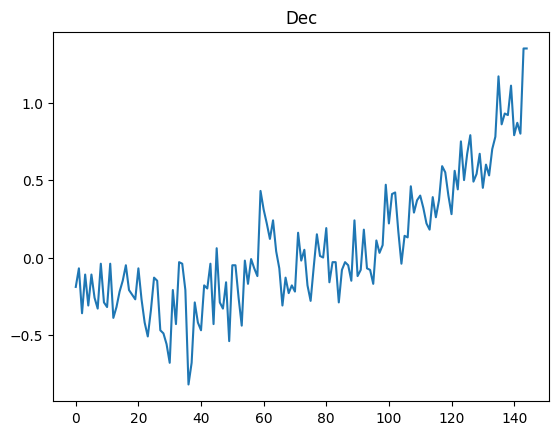

In [ ]:
columns = df.columns
for i in columns:
    plt.figure()
    plt.plot(df[i])
    plt.title(f"{i}")
    # Run this if you don't have all the charts for months-> plt.savefig(f"chart_{i}.png")

Data Spliting : 80% -> Training | 20% -> Testing

In [11]:
train_df, test_df= train_test_split(df, test_size=0.2, shuffle=False) # Split the data
X_train = train_df.copy(deep=True)
Y_train = train_df.copy(deep=True)
X_test = test_df.copy(deep=True)
Y_test = test_df.copy(deep=True)

# Linear Regression Model

Create Linear Regressor

In [12]:
model = LinearRegression()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)
model.score(X_train, Y_train)

1.0

# Predict and Create Graphs

Predict from the X testing dataset.

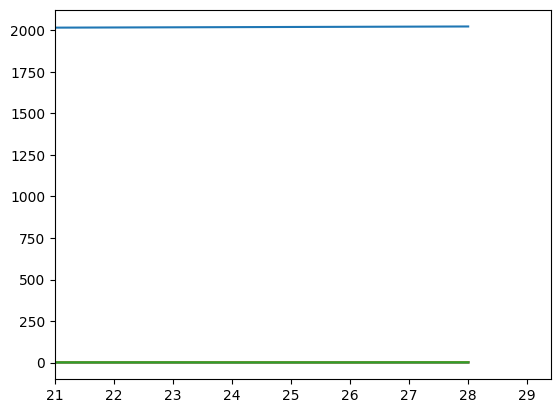

In [13]:
y_predictions_linear = model.predict(X_test)
plt.plot(y_predictions_linear)
plt.xlim(21)
plt.show()
#plt.savefig("Predictions_All.png")